# 1. Checagem dos dados

#### Objetivo do Case | Expansão de uma rede de laboratórios
*Apresentar uma análise exploratória dos dados de uma rede de medicina diagnóstica para definir caminhos de abordagem  que auxiliem a área de negócios da empresa a ter insumos iniciais para suportar seu plano de expansão.*

Este script inicial tem como objetivo realizar checagens nas bases de dados fornecidas para a execução do case
Ao longo das checagens, conforme as anomalias que forem encontradas, será realizada a sanitização dos dados, como a remoção de linhas duplicadas e a padronização do formato e dos nomes das colunas que relacionam uma base com a outras

Ao final do tratamento, as bases tratadas serão salvas na pasta dados_tratados



### importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

### lendo as bases de dados

In [2]:
demographic_data = pd.read_csv('dados_brutos/DemographicData_ZCTAs.csv', index_col = 0)
df_geocode = pd.read_csv('dados_brutos/df_geocode.csv', index_col = 0)
economic_data = pd.read_csv('dados_brutos/EconomicData_ZCTAs.csv', index_col = 0)
test_data = pd.read_csv('dados_brutos/test_data.csv')
transactional_data = pd.read_csv('dados_brutos/transactional_data.csv', sep = ';')

### qual o número de linhas e de colunas de cada base?

In [3]:
pd.DataFrame({
    'base': ['demographic_data', 'df_geocode', 'economic_data', 'test_data', 'transactional_data'],
    'n_colunas': [len(demographic_data.columns), len(df_geocode.columns), len(economic_data.columns), len(test_data.columns), len(transactional_data.columns)],
    'n_linhas': [len(demographic_data), len(df_geocode), len(economic_data), len(test_data), len(transactional_data)]
})

,base,n_colunas,n_linhas
0,demographic_data,18,33120
1,df_geocode,4,119
2,economic_data,12,629280
3,test_data,6,2002
4,transactional_data,8,2355241


### verificando as primeiras linhas de cada dataframe

1. demographic_data

In [4]:
# dados demográficos relevantes a nível de ZCTA (zip code tabulation area)
demographic_data.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


2. df_geocode

In [5]:
# informações a respeito da localização de cada laboratório, como endereço, lat-long e ZCTA (zipcode) no qual o laboratório se encontra
df_geocode.head()

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


3. economic_data

In [6]:
# dados econômicos relevantes a nível de ZCTAs
economic_data.head()

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [7]:
# a coluna "id" está em minúsculo, e a "Geographic Area Name" está com as palavras separadas.
# é importante alterar os nomes para ficarem exatamente iguais aos nomes dessas respectivas colunas no dataframe demographic_data

economic_data = economic_data.rename({'id':'Id', 'Geographic Area Name':'GeographicAreaName'}, axis = 1)
economic_data.head()

,Id,GeographicAreaName,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


4. test_data

In [8]:
# informações a respeito dos exames, características como custo de aplicação e outras especificidades técnicas
test_data.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


5. transactional_data

In [9]:
# registros de exames feitos por pacientes da rede em cada laboratório
transactional_data.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


### há linhas duplicadas em cada dataframe?

In [10]:
print('n_dup_demographic_data =', demographic_data.duplicated().sum())
print('n_dup_df_geocode =', df_geocode.duplicated().sum())
print('n_dup_economic_data =', economic_data.duplicated().sum())
print('n_dup_test_data =', test_data.duplicated().sum())
print('n_dup_transactional_data =', transactional_data.duplicated().sum())

n_dup_demographic_data = 0
n_dup_df_geocode = 0
n_dup_economic_data = 596160
n_dup_test_data = 0
n_dup_transactional_data = 14519


os dataframes **economic_data** e **transactional_data** possuem linhas duplicadas. é necessário removê-las antes de prosseguir com as checagens

In [11]:
economic_data1 = economic_data.drop_duplicates()
transactional_data1 = transactional_data.drop_duplicates()

# verificar se as linhas foram removidas
print('original =', len(economic_data), len(transactional_data))
print('original - duplicados =', len(economic_data) - economic_data.duplicated().sum(), len(transactional_data) - transactional_data.duplicated().sum())
print('tratado =', len(economic_data1), len(transactional_data1))

original = 629280 2355241
original - duplicados = 33120 2340722
tratado = 33120 2340722


### há missings nos dataframes?
verificar se há valores vazios em cada base

<Axes: >

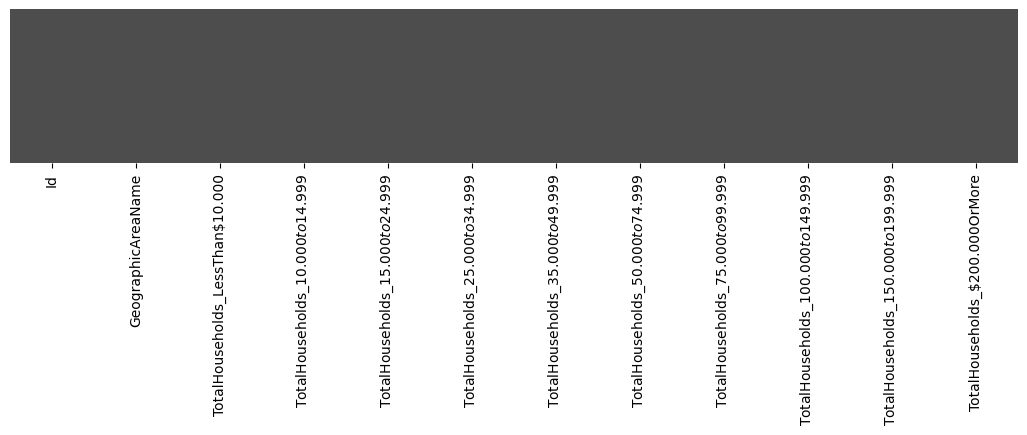

In [12]:
# economic data

plt.figure(figsize = (13,2))
sns.heatmap(economic_data1.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

<Axes: >

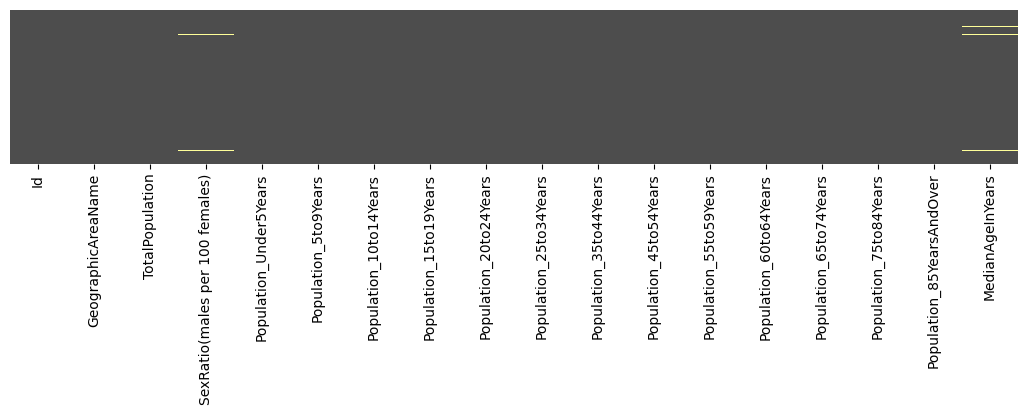

In [13]:
# demographic data

plt.figure(figsize = (13,2))
sns.heatmap(demographic_data.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

<Axes: >

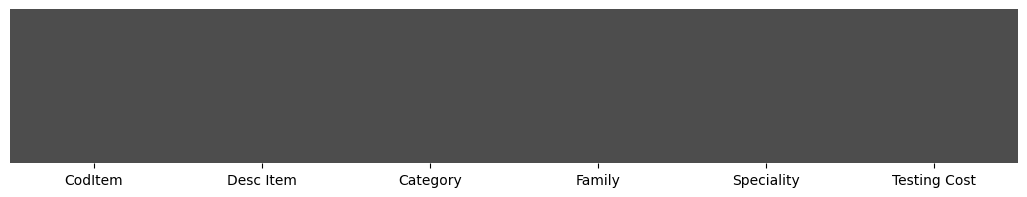

In [14]:
# test data

plt.figure(figsize = (13,2))
sns.heatmap(test_data.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

<Axes: >

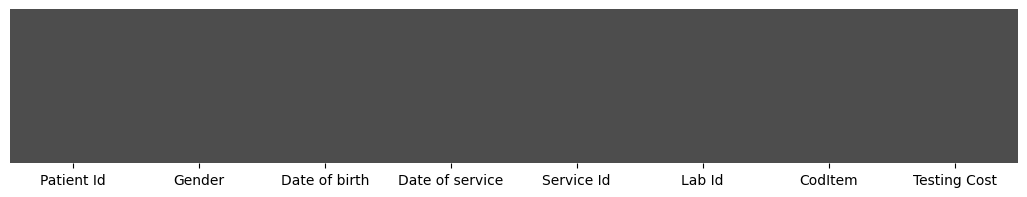

In [15]:
# transactional data

plt.figure(figsize = (13,2))
sns.heatmap(transactional_data1.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

<Axes: >

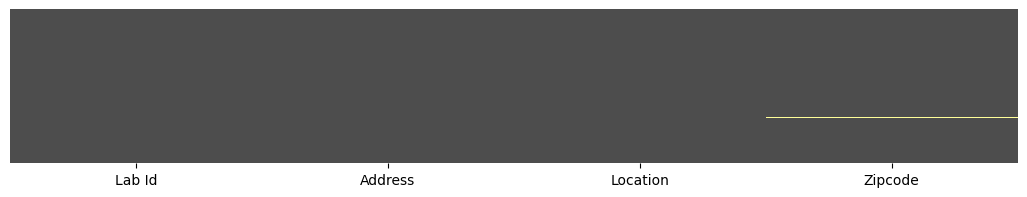

In [16]:
# df geocode

plt.figure(figsize = (13,2))
sns.heatmap(df_geocode.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

há alguns missings nas bases **demographic_data** e **df_geocode**. investigar quais são esses missings

#### base demographic_data

número de linhas com missings = 617
Axes(0.125,0.11;0.775x0.77)


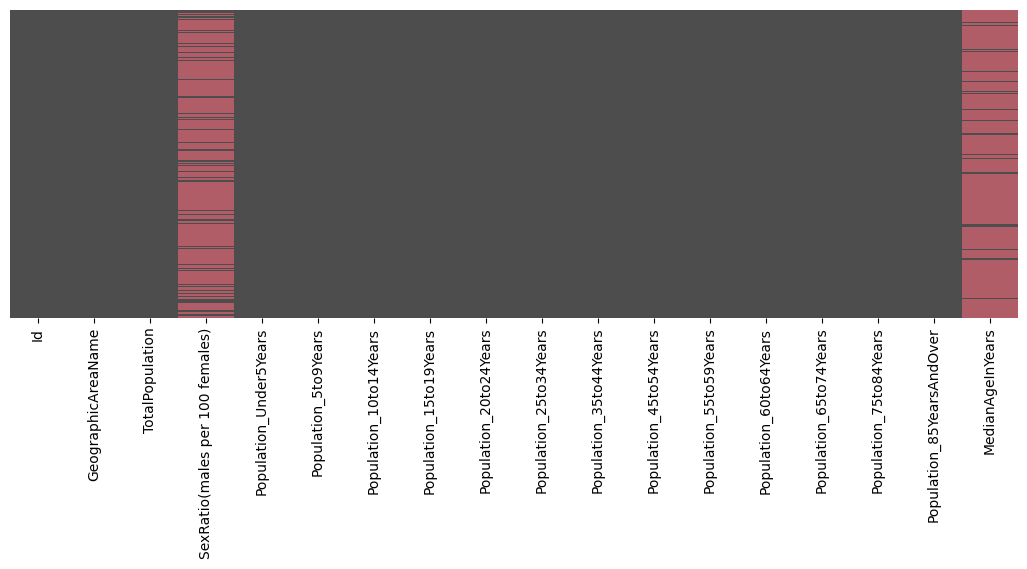

In [17]:
# seleciona apenas as colunas que contêm valores nulos
null_demographic_data = demographic_data.columns[demographic_data.isnull().any()].tolist()

# filtra o DataFrame original para exibir apenas as linhas que contêm valores nulos
null_demographic_data = demographic_data[demographic_data[null_demographic_data].isnull().any(axis = 1)]

print('número de linhas com missings =', len(null_demographic_data))

plt.figure(figsize = (13,4))
print(sns.heatmap(null_demographic_data.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#B15D67']))

In [18]:
# percentual de missings de cada coluna

print('% missings sex ratio =', round(len(demographic_data[demographic_data['SexRatio(males per 100 females)'].isnull()]) * 100 / len(demographic_data), 2), '%')

print('% missings median age =', round(len(demographic_data[demographic_data['MedianAgeInYears'].isnull()]) * 100 / len(demographic_data), 2), '%')

% missings sex ratio = 1.51 %
% missings median age = 1.72 %


In [19]:
# como estão as linhas que tem estes valores nulos?
null_demographic_data.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
5,8600000US35013,ZCTA5 35013,46,NaN,0,0,0,0,0,0,15,31,0,0,0,0,0,47.9
42,8600000US35074,ZCTA5 35074,99,86.8,0,0,0,0,0,99,0,0,0,0,0,0,0,NaN
47,8600000US35082,ZCTA5 35082,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
97,8600000US35187,ZCTA5 35187,6,100.0,0,0,0,0,0,0,0,0,0,0,6,0,0,NaN
142,8600000US35457,ZCTA5 35457,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [20]:
# aparentemente são áreas que possuem uma população bem baixa. verificar as populações da maior para a menor

null_demographic_data.sort_values('TotalPopulation', ascending = False).head(10)['TotalPopulation']

1084     4671
4918     3228
12544    3008
12614    2816
22569    2627
30405    2112
4573     2002
19837    1709
28014    1250
32466    1173
Name: TotalPopulation, dtype: int64

In [21]:
# quais as áreas com maior população da base completa?

demographic_data.sort_values('TotalPopulation', ascending = False).head()['TotalPopulation']

28338    128294
28375    118291
19135    112088
29291    111620
1885     111165
Name: TotalPopulation, dtype: int64

pelo fato das populações serem pequenas em relação às áreas de maior população da base demographics_data, é justificável que não tenha as informações de sex ratio (pode ser que nessas regiões não tenham homens ou tenham poucos) e de mediana de idade. 

no caso dos dados sex ratio, não teria como fazer uma estimativa para substituir estes valores vazios, então caso este dado seja usado em alguma análise, não seria possível obter esta informação para estes zip codes, então estes seriam descartados.

no caso da mediana de idade, como temos a população por faixa etária, seria possível fazer uma estimativa fazendo uma média ponderada com os valores de cada faixa etária.

In [22]:
## gerar uma base com os valores nulos de mediana de idade para os zipcodes que tem a população maior que 0

missings_median_age = demographic_data[demographic_data['MedianAgeInYears'].isnull()]
missings_median_age = missings_median_age[missings_median_age['TotalPopulation'] > 0]
missings_median_age

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
42,8600000US35074,ZCTA5 35074,99,86.8,0,0,0,0,0,99,0,0,0,0,0,0,0,NaN
97,8600000US35187,ZCTA5 35187,6,100.0,0,0,0,0,0,0,0,0,0,0,6,0,0,NaN
178,8600000US35559,ZCTA5 35559,12,100.0,0,0,0,0,0,0,6,6,0,0,0,0,0,NaN
207,8600000US35615,ZCTA5 35615,60,252.9,0,0,0,0,0,0,43,0,17,0,0,0,0,NaN
403,8600000US36267,ZCTA5 36267,7,NaN,0,0,0,0,0,0,0,0,7,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32873,8600000US82422,ZCTA5 82422,17,88.9,0,0,0,0,0,0,0,0,0,0,9,8,0,NaN
32908,8600000US82640,ZCTA5 82640,45,80.0,0,0,0,0,0,0,0,0,0,20,25,0,0,NaN
32935,8600000US82833,ZCTA5 82833,96,113.3,0,0,0,0,0,0,0,0,0,0,45,51,0,NaN
32943,8600000US82844,ZCTA5 82844,20,100.0,0,0,0,0,0,0,0,0,0,0,0,20,0,NaN


In [24]:
# removendo as colunas desnecessárias

missings_median_age2 = missings_median_age.drop(['Id', 'SexRatio(males per 100 females)', 'MedianAgeInYears', 'TotalPopulation'], axis = 1)

# pivotando a tabela para calcular a média ponderada

missings_long = pd.melt(missings_median_age2, id_vars=['GeographicAreaName'], var_name = 'idade_cat', value_name = 'total_pessoas')
missings_long['idade_cat'].unique()

array(['Population_Under5Years', 'Population_5to9Years',
       'Population_10to14Years', 'Population_15to19Years',
       'Population_20to24Years', 'Population_25to34Years',
       'Population_35to44Years', 'Population_45to54Years',
       'Population_55to59Years', 'Population_60to64Years',
       'Population_65to74Years', 'Population_75to84Years',
       'Population_85YearsAndOver'], dtype=object)

In [25]:
# criar uma coluna que substitua os intervalos de idade pela idade do meio de cada intervalo

def idade_meio(x):
    if x == "Population_Under5Years":
        return 2
    elif x == "Population_5to9Years":
        return 7
    elif x == "Population_10to14Years":
        return 12
    elif x == "Population_15to19Years":
        return 17
    elif x == "Population_20to24Years":
        return 22
    elif x == "Population_25to34Years":
        return 30
    elif x == "Population_35to44Years":
        return 40
    elif x == "Population_45to54Years":
        return 50
    elif x == "Population_55to59Years":
        return 60
    elif x == "Population_60to64Years":
        return 62
    elif x == "Population_65to74Years":
        return 70
    elif x == "Population_75to84Years":
        return 80
    elif x == "Population_85YearsAndOver":
        return 85
    
missings_long2 = missings_long
missings_long2['idade_meio'] = missings_long2['idade_cat'].apply(idade_meio)
missings_long2['total_pessoas_x_idade'] = missings_long['total_pessoas'] * missings_long['idade_meio']
missings_long2 = missings_long2.drop('idade_meio', axis = 1)
missings_long2.sort_values('GeographicAreaName').head(15)

,GeographicAreaName,idade_cat,total_pessoas,total_pessoas_x_idade
1884,ZCTA5 01066,Population_55to59Years,0,0
2334,ZCTA5 01066,Population_65to74Years,0,0
2109,ZCTA5 01066,Population_60to64Years,0,0
759,ZCTA5 01066,Population_15to19Years,0,0
1209,ZCTA5 01066,Population_25to34Years,0,0
2559,ZCTA5 01066,Population_75to84Years,0,0
309,ZCTA5 01066,Population_5to9Years,0,0
984,ZCTA5 01066,Population_20to24Years,0,0
84,ZCTA5 01066,Population_Under5Years,0,0
1434,ZCTA5 01066,Population_35to44Years,0,0


In [26]:
# fazendo o somatório do total de pessoas e do (total de pessoas * idade) para cada zipcode
total_pessoas_area = missings_long2.groupby('GeographicAreaName').sum().reset_index()

# renomear as colunas que foram calculadas
total_pessoas_area = total_pessoas_area.rename({'total_pessoas':'total_pessoas_area', 'total_pessoas_x_idade': 'total_pessoas_x_idade_area'}, axis = 1)

total_pessoas_area

C:\Users\Leticia\AppData\Local\Temp\ipykernel_14812\4264650509.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_pessoas_area = missings_long2.groupby('GeographicAreaName').sum().reset_index()


,GeographicAreaName,total_pessoas_area,total_pessoas_x_idade_area
0,ZCTA5 01066,31,2635
1,ZCTA5 02203,30,2260
2,ZCTA5 04741,4,248
3,ZCTA5 04933,29,1790
4,ZCTA5 04944,41,2542
...,...,...,...
220,ZCTA5 98641,23,1840
221,ZCTA5 98853,14,924
222,ZCTA5 98921,127,7710
223,ZCTA5 99732,12,670


In [27]:
missings_long3 = missings_long2.merge(total_pessoas_area, how = 'left')

# calculando a média ponderada e atribuindo à coluna MedianAgeInYears
missings_long3['MedianAgeInYears'] = round(missings_long3['total_pessoas_x_idade_area'] / missings_long3['total_pessoas_area'], 1)

missings_long3 = missings_long3.drop_duplicates(subset = 'GeographicAreaName')[['GeographicAreaName', 'MedianAgeInYears']]
missings_long3

,GeographicAreaName,MedianAgeInYears
0,ZCTA5 35074,30.0
1,ZCTA5 35187,70.0
2,ZCTA5 35559,45.0
3,ZCTA5 35615,45.7
4,ZCTA5 36267,60.0
...,...,...
220,ZCTA5 82422,74.7
221,ZCTA5 82640,66.4
222,ZCTA5 82833,75.3
223,ZCTA5 82844,80.0


In [28]:
# colocando a média ponderada calculada na base com os zipcodes que estavam sem a mediana de idade

missings_median_age3 = missings_median_age

missings_median_age3 = missings_median_age3.drop('MedianAgeInYears', axis = 1)
missings_median_age3 = missings_median_age3.merge(missings_long3, how = 'left')
missings_median_age3.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35074,ZCTA5 35074,99,86.8,0,0,0,0,0,99,0,0,0,0,0,0,0,30.0
1,8600000US35187,ZCTA5 35187,6,100.0,0,0,0,0,0,0,0,0,0,0,6,0,0,70.0
2,8600000US35559,ZCTA5 35559,12,100.0,0,0,0,0,0,0,6,6,0,0,0,0,0,45.0
3,8600000US35615,ZCTA5 35615,60,252.9,0,0,0,0,0,0,43,0,17,0,0,0,0,45.7
4,8600000US36267,ZCTA5 36267,7,NaN,0,0,0,0,0,0,0,0,7,0,0,0,0,60.0


In [29]:
# removendo os missings da base original

demographic_data1 = demographic_data
demographic_data1 = demographic_data1[~demographic_data1['GeographicAreaName'].isin(missings_median_age3['GeographicAreaName'])]

print(len(demographic_data))
print(len(demographic_data1))

33120
32895


In [30]:
# juntando a base tratada com o restante da base original

demographic_data1 = pd.concat([demographic_data1, missings_median_age3], axis = 0)

print(len(demographic_data))
print(len(demographic_data1))

33120
33120


In [31]:
# conferindo novamente os missings colocando a totalpopulation em ordem decrescente

demographic_data1[demographic_data1['MedianAgeInYears'].isnull()].sort_values('TotalPopulation', ascending = False).head()[['GeographicAreaName', 'TotalPopulation', 'MedianAgeInYears']]

,GeographicAreaName,TotalPopulation,MedianAgeInYears
47,ZCTA5 35082,0,NaN
19138,ZCTA5 11371,0,NaN
19767,ZCTA5 12911,0,NaN
19748,ZCTA5 12862,0,NaN
19597,ZCTA5 12527,0,NaN


ainda há missings nesta coluna pois não é possível calcular a média ponderada das idades para áreas onde a população é 0

essas áreas serão mantidas na base caso seja necessária a informação de que a população delas é nula

#### base df_geocode

número de linhas com missings = 1
Axes(0.125,0.11;0.775x0.77)


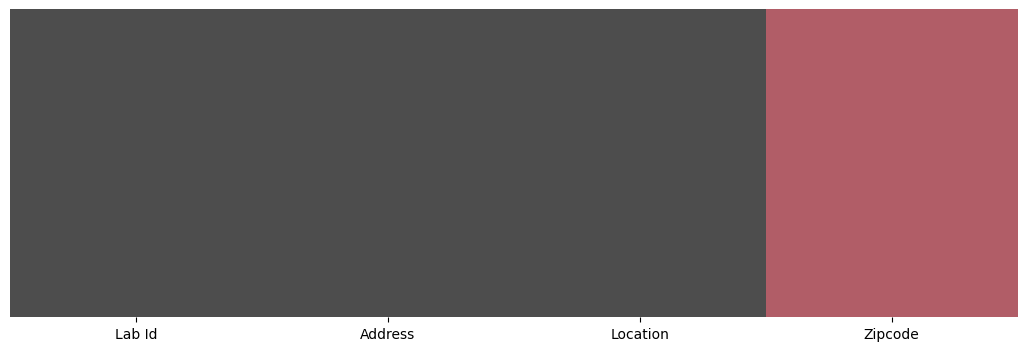

In [32]:
# selecionar apenas as colunas que contém valores nulos
null_df_geocode = df_geocode.columns[df_geocode.isnull().any()].tolist()

# filtra o dataframe original para exibir apenas as linhas que contém valores nulos
null_df_geocode = df_geocode[df_geocode[null_df_geocode].isnull().any(axis = 1)]

print('número de linhas com missings =', len(null_df_geocode))

plt.figure(figsize = (13,4))
print(sns.heatmap(null_df_geocode.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#B15D67']))

In [33]:
# apenas uma linha vazia. qual é essa linha?

df_geocode[df_geocode['Zipcode'].isnull()]

,Lab Id,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


n linhas df_geocode = 119
n linhas df_geocode1 = 118
Axes(0.125,0.11;0.775x0.77)


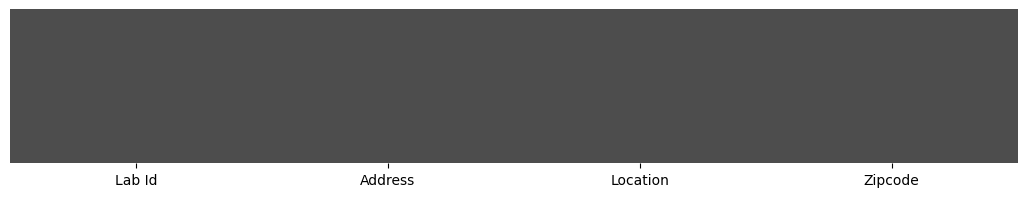

In [34]:
# aparentemente é um erro de registro. remover esta linha

df_geocode1 = df_geocode.dropna(subset = 'Zipcode')

# confirmando a remoção 

print('n linhas df_geocode =', len(df_geocode))
print('n linhas df_geocode1 =', len(df_geocode1))

plt.figure(figsize = (13,2))
print(sns.heatmap(df_geocode1.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99']))

### mapeamento das colunas que relacionam as bases disponíveis

criando um dataframe com a lista de colunas de cada base

In [35]:
# considerar os dataframes atualizados

df1 = demographic_data1.columns.tolist()
df1 = pd.DataFrame(df1, columns = ['columns'])
df1['1_demographic_data'] = 'x'

df2 = df_geocode1.columns.tolist()
df2 = pd.DataFrame(df2, columns = ['columns'])
df2['2_df_geocode'] = 'x'

df3 = economic_data1.columns.tolist()
df3 = pd.DataFrame(df3, columns = ['columns'])
df3['3_economic_data'] = 'x'

df4 = test_data.columns.tolist()
df4 = pd.DataFrame(df4, columns = ['columns'])
df4['4_test_data'] = 'x'

df5 = transactional_data1.columns.tolist()
df5 = pd.DataFrame(df5, columns = ['columns'])
df5['5_transactional_data'] = 'x'

# exemplo de como fica o dataframe com a lista de colunas para cada base:
df2

,columns,2_df_geocode
0,Lab Id,x
1,Address,x
2,Location,x
3,Zipcode,x


juntando todas as listas criadas para verificar as colunas em comum

In [36]:
merged = df1.merge(df2, how = 'outer').merge(df3, how = 'outer').merge(df4, how = 'outer').merge(df5, how = 'outer')
merged

,columns,1_demographic_data,2_df_geocode,3_economic_data,4_test_data,5_transactional_data
0,Id,x,NaN,x,NaN,NaN
1,GeographicAreaName,x,NaN,x,NaN,NaN
2,TotalPopulation,x,NaN,NaN,NaN,NaN
3,SexRatio(males per 100 females),x,NaN,NaN,NaN,NaN
4,Population_Under5Years,x,NaN,NaN,NaN,NaN
5,Population_5to9Years,x,NaN,NaN,NaN,NaN
6,Population_10to14Years,x,NaN,NaN,NaN,NaN
7,Population_15to19Years,x,NaN,NaN,NaN,NaN
8,Population_20to24Years,x,NaN,NaN,NaN,NaN
9,Population_25to34Years,x,NaN,NaN,NaN,NaN


filtrando apenas as colunas que aparecem em pelo menos 2 bases

In [37]:
merged['n_dfs'] = merged.count(axis = 1) - 1 # conta os número de colunas com valores não-nulos, subtraindo a coluna dos nomes
merged[merged['n_dfs'] >= 2] # filtra apenas os nomes de colunas que aparecem em pelo menos 2 bases

,columns,1_demographic_data,2_df_geocode,3_economic_data,4_test_data,5_transactional_data,n_dfs
0,Id,x,NaN,x,NaN,NaN,2
1,GeographicAreaName,x,NaN,x,NaN,NaN,2
18,Lab Id,NaN,x,NaN,NaN,x,2
32,CodItem,NaN,NaN,NaN,x,x,2
37,Testing Cost,NaN,NaN,NaN,x,x,2


Observando o dataframe acima, é possível perceber que as bases **test_data** e **transactional_data** possuem 2 colunas em comum. 

Além disso, as bases **demographic_data** e **economic_data** também possuem 2 colunas em comum.

É importante investigar se essas duas colunas são correspondentes

### investigando as duas colunas em comum das bases test_data e transactional_data

In [38]:
test_data[['CodItem', 'Testing Cost']].head(10).sort_values(by = 'CodItem')

,CodItem,Testing Cost
3,70000103,0.80
9,70000168,2.38
4,70000224,1.02
8,70000392,1.43
1,70000638,2.46
6,70001206,2.20
2,70001597,2.11
5,70002653,1.29
0,70003237,1.78
7,70005903,2.20


In [39]:
transactional_data1[['CodItem', 'Testing Cost']].head(10).sort_values(by = 'CodItem')

,CodItem,Testing Cost
3,70000103,"11,0"
9,70000168,"48,0"
4,70000224,"10,0"
8,70000392,"8,0"
1,70000638,"13,0"
6,70001206,"41,0"
2,70001597,"49,0"
5,70002653,"8,0"
0,70003237,"9,0"
7,70005903,"57,0"


os valores de testing cost estão diferentes para cada coditem em cada dataframe. na amostra observada, test_data, os valores de cada teste são sempre mais baixos

assim, é possível concluir que o testing cost no dataframe test_data é relativo ao custo do teste para a empresa, e no dataframe transactional_data é relativo ao valor que o cliente pagou pelo teste

é importante conferir se há valores duplicados na base test_data; se for o caso, há testes com mais de um valor

é importante também verificar se na base transactional_data há códigos de testes que não existem na base test_data, indicando que foram realizados testes que não tem seus valores tabelados

In [40]:
# contar o número de ocorrências de cada código na coluna CodItem da base test_data
n_cod = test_data['CodItem'].value_counts()

n_cod.head()

70004701    2
70003237    1
70004880    1
70005992    1
70004977    1
Name: CodItem, dtype: int64

In [41]:
# filtrar os códigos que aparecem mais de uma vez
test_data[test_data['CodItem'] == n_cod[n_cod > 1].index.tolist()[0]]

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1208,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96
1968,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96


aparentemente todas as informações deste teste estão duplicadas em todas as colunas

para fazer um double check, é possível confirmar que o Desc Item das colunas duplicadas não está escrito diferente em cada observação

In [42]:
test_data[test_data['CodItem'] == 70004701]['Desc Item'].tolist()

['PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOISTOQUIMICA (DUAS A CINCO REACOES)',
 'PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOISTOQUIMICA (DUAS A CINCO REACOES)']

as linhas estão de fato duplicadas. sendo assim, podemos remover a segunda observação

In [43]:
test_data1 = test_data.drop_duplicates(subset = 'CodItem')

# confirmando a remoção da linha duplicada
print('n linhas original:', len(test_data))
print('n linhas:', len(test_data1))

n linhas original: 2002
n linhas: 2001


agora, é importante ver se todos os testes presentes na base transactional_data estão tabelados na test_data

In [44]:
# fazer lista com todos os códigos que aparecem na base transactional_data
cod_unicos_transact = transactional_data1['CodItem'].unique().tolist()

# colocar em um dataframe
cod_unicos_transact = pd.DataFrame({'CodItem': cod_unicos_transact})

cod_unicos_transact

# verificar se todos estes códigos aparecem na base teste_data
cod_unicos_transact = cod_unicos_transact.merge(test_data1[['CodItem', 'Desc Item']], how = 'left')

# filtrar apenas as linhas que estão sem desc_item
sem_desc = cod_unicos_transact[cod_unicos_transact['Desc Item'].isnull()]

print('n testes sem descrição =', len(sem_desc))

n testes sem descrição = 62


tem 62 testes que não estão tabelados na test_data. quantas vezes eles ocorrem na transactional_data?

In [45]:
# filtrando apenas os coditems que não aparecem no test_data
n_obs_sem_data = transactional_data1.loc[transactional_data1['CodItem'].isin(sem_desc['CodItem'])]

# transformando o testing cost em float
n_obs_sem_data['Testing Cost'] = n_obs_sem_data['Testing Cost'].str.replace(',', '.').astype('float')

# ordenando o dataframe pelo testing cost do mais alto para o mais baixo
n_obs_sem_data.sort_values('Testing Cost', ascending = False)

C:\Users\Leticia\AppData\Local\Temp\ipykernel_14812\3231442829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_obs_sem_data['Testing Cost'] = n_obs_sem_data['Testing Cost'].str.replace(',', '.').astype('float')


,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
2240790,7663884867-1,F,21/10/1934 00:00:00,2021-01-17,7663884867-1-1,L139,70006954,3452.0
1346719,2584402127-1,M,31/10/1981 00:00:00,2020-03-25,2584402127-1017-1,L139,70006954,3452.0
871101,10211031558-BIO003,F,06/06/2003 00:00:00,2019-10-04,576608649729-91,L167,70001193,3045.0
1618198,2580525074-1,F,02/12/1978 00:00:00,2020-04-02,2580525074-4-1,L664,70008601,2900.0
2056779,6175190652-1,F,11/05/1985 00:00:00,2020-11-27,6175190652-3-1,L132,70008810,2600.0
...,...,...,...,...,...,...,...,...
1602616,7661113967-1,F,15/01/1944 00:00:00,2020-05-26,7661113967-2-1,L133,70006817,0.0
1469790,7660125938-1,F,19/07/1942 00:00:00,2020-05-08,7660125938-5-1,L150,70006932,0.0
1906236,7662550834-1,M,19/06/1979 00:00:00,2020-09-15,7662550834-6-1,L152,70006094,0.0
1469787,7660125938-1,F,19/07/1942 00:00:00,2020-05-08,7660125938-5-1,L150,70006936,0.0


são apenas 291 observações. quanto isso representa do total de observações?

In [46]:
print(round(len(n_obs_sem_data) * 100 / len(transactional_data1), 4), '%')

0.0124 %


cerca de 0.01% do total. Quais os valores que costumam aparecer?

<Axes: xlabel='Testing Cost', ylabel='Count'>

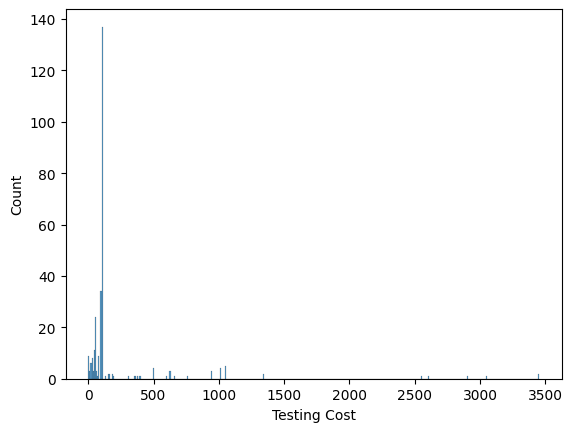

In [47]:
sns.histplot(data = n_obs_sem_data, x = 'Testing Cost')

os valores são bem variados. olhando para a preview da tabela, não parece ter um padrão nas outras variáveis que indique o porquê destes códigos não estarem tabelados.

alguns pacientes estão com o id em um formato diferente do visto nas primeiras colunas do transactional_data.

isso acontece apenas para estes que o código do teste não está tabelado ou foi uma mudança no sistema?

In [48]:
padrao_id_paciente = transactional_data1[['Patient Id']]
padrao_id_paciente['final_cod'] = padrao_id_paciente['Patient Id'].str.split('-').str[-1]
padrao_id_paciente['final_cod'].value_counts().to_frame()

C:\Users\Leticia\AppData\Local\Temp\ipykernel_14812\646561642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padrao_id_paciente['final_cod'] = padrao_id_paciente['Patient Id'].str.split('-').str[-1]


,final_cod
1,1522355
BIO003,383243
BIO002,281251
BIO010,146034
UND2243,6867
UND2113,963
2,9


como há muitas observações de cada padrão, o final "-1" não é específico dos pacientes que fizeram testes não tabelados.

portanto, mesmo que não estejam tabelados, vale a pena manter as observações com estes códigos para que eles sejam considerados nas análises que não dependam das informações dos testes.


### qual a primeira e a última data das transações?

In [49]:
print('primeira data =', transactional_data['Date of service'].min())
print('última data =', transactional_data['Date of service'].max())

primeira data = 2019-01-01
última data = 2021-02-12


portanto, há dados de transações dos anos de 2019, 2020 e do início de 2021

### todos os Geographic Area Name começam com ZCTA5?

se for este o caso, remover este código e deixar somente o número para facilitar o merge com a base df_geocode, que tem as informações dos laboratórios

transformar o nome da coluna para zipcode

In [50]:
# base economic_data

zcta = economic_data1[['GeographicAreaName']]
zcta['inicio'] = zcta['GeographicAreaName'].str.split(' ').str[0]
zcta
zcta['inicio'].value_counts().to_frame()

C:\Users\Leticia\AppData\Local\Temp\ipykernel_14812\492120435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zcta['inicio'] = zcta['GeographicAreaName'].str.split(' ').str[0]


,inicio
ZCTA5,33120


In [51]:
# base demographic_data1

zcta = demographic_data1[['GeographicAreaName']]
zcta['inicio'] = zcta['GeographicAreaName'].str.split(' ').str[0]
zcta
zcta['inicio'].value_counts().to_frame()

C:\Users\Leticia\AppData\Local\Temp\ipykernel_14812\4284160606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zcta['inicio'] = zcta['GeographicAreaName'].str.split(' ').str[0]


,inicio
ZCTA5,33120


todos começam com ZCTA5. portanto, este fragmento pode ser removido das strings para que seja possível relacionar estes dataframes com o df_geocode (que tem os zipcodes dos laboratórios)

In [52]:
economic_data2 = economic_data1
demographic_data2 = demographic_data1

economic_data2['Zipcode'] = economic_data1['GeographicAreaName'].str.split(' ').str[1].astype('float')
demographic_data2['Zipcode'] = demographic_data1['GeographicAreaName'].str.split(' ').str[1].astype('float')

C:\Users\Leticia\AppData\Local\Temp\ipykernel_14812\116349905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data2['Zipcode'] = economic_data1['GeographicAreaName'].str.split(' ').str[1].astype('float')


agora é possível relacionar o zipcode dos laboratórios com suas respectivas informações econômicas e demográficas.

a coluna de ID do zipcode é desnecessária, pois não será utilizada para relacionar os dataframes

### o formato dos dados das colunas Testing Cost das bases test_data e transactional_data está igual?

na preview das bases, um está com vírgula e outro com ponto

In [53]:
print(type(test_data1['Testing Cost'].iloc[0]))
print(type(transactional_data1['Testing Cost'].iloc[0]))

<class 'numpy.float64'>
<class 'str'>


não é o caso, então é importante padronizar os formatos. como é um valor numérico, não faz sentido que esteja como string. portanto, é necessário transformar a coluna da base transactional_data1 em float

mesmo que esta coluna tenha significados diferentes em cada base, é importante padronizar para que em ambas as bases, esta coluna esteja no formato float (número decimal)

ambas podem ser relacionadas para calcular o lucro, por exemplo

In [54]:
transactional_data2 = transactional_data1

transactional_data2['Testing Cost'] = transactional_data2['Testing Cost'].str.replace(',', '.').astype('float')

# testando a alteração
print(type(transactional_data2['Testing Cost'].iloc[0]))

<class 'numpy.float64'>


C:\Users\Leticia\AppData\Local\Temp\ipykernel_14812\4093670915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactional_data2['Testing Cost'] = transactional_data2['Testing Cost'].str.replace(',', '.').astype('float')


como a coluna  "Testing Cost" é relativa ao valor pago pelo cliente, é recomendável renomeá-la para evitar a confusão com o "Testing Cost" da base test_data

In [55]:
transactional_data3 = transactional_data2

transactional_data3 = transactional_data3.rename({'Testing Cost': 'Valor Pago'}, axis = 1)
transactional_data3.head(3)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Valor Pago
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0


### há alguma anomalia nas idades dos clientes? calcular a idade com base na data de nascimento e de serviço

In [56]:
# Converter as colunas de datas para objetos datetime
transactional_data4 = transactional_data3

transactional_data4['Date of birth'] = pd.to_datetime(transactional_data4['Date of birth'], format='%d/%m/%Y %H:%M:%S')
transactional_data4['Date of service'] = pd.to_datetime(transactional_data4['Date of service'], format='%Y-%m-%d')

# Calcular a idade em anos
transactional_data4['Idade'] = (transactional_data4['Date of service'] - transactional_data4['Date of birth']) // datetime.timedelta(days=365)
transactional_data4.sort_values('Idade', ascending = False).head(20)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Valor Pago,Idade
830128,10225811036-BIO002,M,1859-12-28,2019-09-19,574604575219-67,L152,70004795,264.0,159.0
1670364,6162950424-1,F,1900-01-01,2020-04-05,6162950424-1-1,L139,70004461,94.0,120.0
356632,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70002619,12.0,119.0
356628,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70000301,12.0,119.0
356629,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70001276,53.0,119.0
85068,-2,I,1900-01-01,2019-02-22,532800338922-132,L069,70003759,14.0,119.0
637178,-2,I,1900-01-01,2019-08-31,569403826990-11,L121,70006532,0.0,119.0
356630,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70004134,10.0,119.0
356631,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70003200,9.0,119.0
356634,-2,I,1900-01-01,2019-05-04,571904995402-38,L133,70003239,47.0,119.0


as primeiras linhas do dataframe ordenado pela idade decrescente aparentam ter uma serta anomalia nas observações dos clientes com idade igual ou maior a 119.

investigando estas pessoas:

In [57]:
anomalia_idade = transactional_data4

# verificando se todos os pacientes com final "-2" possuem anomalia
anomalia_idade['final_id'] = anomalia_idade['Patient Id'].str.split('-').str[1]
anomalia_idade[anomalia_idade['final_id'] == '2']

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Valor Pago,Idade,final_id
85068,-2,I,1900-01-01,2019-02-22,532800338922-132,L069,70003759,14.0,119.0,2
356628,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70000301,12.0,119.0,2
356629,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70001276,53.0,119.0,2
356630,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70004134,10.0,119.0,2
356631,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70003200,9.0,119.0,2
356632,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70002619,12.0,119.0,2
356633,-2,I,1900-01-01,2019-05-04,571904995402-38,L133,70002141,47.0,119.0,2
356634,-2,I,1900-01-01,2019-05-04,571904995402-38,L133,70003239,47.0,119.0,2
637178,-2,I,1900-01-01,2019-08-31,569403826990-11,L121,70006532,0.0,119.0,2


os clientes que estão com o final do id "-2" parecem estar com erro no registro, pois o gênero está como "indefinido", não tem código do id e todos estão com a mesma data de nascimento, e datas de serviço diferentes. estes casos podem ser mantidos na base por enquanto, já que as outras informações dos testes parecem estar coerentes.

In [58]:
# os pacientes com idade alta fizeram outros exames? é possível confirmar a idade deles com base nestes outros exames?

pacientes_idade = anomalia_idade[(anomalia_idade['Idade'] > 106) & (anomalia_idade['final_id'] != '2')]

transactional_data4[transactional_data4['Patient Id'].isin(pacientes_idade['Patient Id'])]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Valor Pago,Idade,final_id
67251,10240392383-BIO010,M,1911-08-20,2019-02-06,529400111857-122,L668,70005506,55.0,107.0,BIO010
157572,10240370370-BIO010,M,1911-08-20,2019-03-03,529400114551-122,L668,70005506,55.0,107.0,BIO010
830128,10225811036-BIO002,M,1859-12-28,2019-09-19,574604575219-67,L152,70004795,264.0,159.0,BIO002
1670364,6162950424-1,F,1900-01-01,2020-04-05,6162950424-1-1,L139,70004461,94.0,120.0,1


estes pacientes possuem apenas estas observações, então não é possível confirmar se há anomalias nessas idades.

até 120 anos é aceitável, mas este paciente que tem 159 anos causa estranhamento

a observação dele será mantida, mas a informação de idade dele não está confiável

### padronizar a coluna de id das bases demographic_data e economic_data

In [59]:
# é possível remover a Id e a GeographicAreaName e manter apenas a Zipcode como coluna que relaciona esta base com outras

demographic_data3 = demographic_data2

zipcode_index = demographic_data3.columns.get_loc('Zipcode')

demographic_data3 = pd.concat([demographic_data3['Zipcode'], demographic_data3.iloc[:, 2:zipcode_index]], axis=1)
demographic_data3.head(3)

,Zipcode,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,35004.0,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,35005.0,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,35006.0,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2


In [60]:
# o mesmo tratamento pode ser realizado para a economic_data

economic_data3 = economic_data2

zipcode_index = economic_data3.columns.get_loc('Zipcode')

economic_data3 = pd.concat([economic_data3['Zipcode'], economic_data3.iloc[:, 2:zipcode_index]], axis=1)
economic_data3.head(3)

,Zipcode,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,35004.0,198,71,298,513,647,1117,529,945,245,61
1,35005.0,188,184,318,293,353,562,299,407,67,26
2,35006.0,71,20,117,104,154,176,124,194,51,7


### os zipcodes de todos os laboratórios estão nas bases de demographic e economic data?

In [68]:
zipcodes = df_geocode[['Lab Id', 'Zipcode']]

zipcodes = zipcodes.merge(demographic_data3[['Zipcode', 'TotalPopulation']], how = 'left')
zipcodes.sort_values('TotalPopulation', ascending = False)

,Lab Id,Zipcode,TotalPopulation
96,L133,94565.0,97671.0
81,L139,95823.0,79440.0
19,L166,19120.0,74060.0
49,L126,19124.0,70304.0
91,L122,98052.0,70245.0
...,...,...,...
70,L661,61480.0,1171.0
76,L670,13441.0,184.0
5,L158,9134.0,NaN
60,L523,9107.0,NaN


há alguns laboratórios cujo zipcode não consta na base demographic_data.

para conferir, é possível checar se estes zipcodes estão na base economic_data:

In [71]:
zipcodes2 = df_geocode[['Lab Id', 'Zipcode']]

zipcodes2 = zipcodes2.merge(economic_data3[['Zipcode', 'TotalHouseholds_LessThan$10.000']], how = 'left')
zipcodes2.sort_values('TotalHouseholds_LessThan$10.000', ascending = False)

,Lab Id,Zipcode,TotalHouseholds_LessThan$10.000
37,L169,19104.0,4481.0
72,L525,19140.0,4379.0
36,L167,19144.0,3696.0
85,L123,19143.0,3665.0
19,L166,19120.0,3555.0
...,...,...,...
87,L082,3087.0,12.0
76,L670,13441.0,0.0
5,L158,9134.0,NaN
60,L523,9107.0,NaN


também não estão. filtrando apenas os que não estão na base:

In [70]:
zipcodes[zipcodes['TotalPopulation'].isnull()]

,Lab Id,Zipcode,TotalPopulation
5,L158,9134.0,NaN
60,L523,9107.0,NaN
83,-2,NaN,NaN


um destes laboratórios está com a id "-2" e sem zipcode, indicando que pode ser um erro de registro.

quais as outras informações deste laboratório?

In [76]:
df_geocode[df_geocode['Lab Id'] == '-2']

,Lab Id,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


conferindo se há registro na base de transações com laboratórios de id "-2"

In [75]:
transactional_data4[transactional_data4['Lab Id'] == '-2']

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Valor Pago,Idade,final_id
736,537200002706-BIO010,F,1990-04-25,2019-01-18,423700026524-189,-2,70003846,36.0,28.0,BIO010
3783,10240290644-BIO010,F,1990-12-21,2019-01-12,423700025626-189,-2,70003846,36.0,28.0,BIO010
6056,10240394786-BIO010,F,1973-03-20,2019-02-10,423700029327-189,-2,70003846,36.0,45.0,BIO010
6522,10240414578-BIO010,F,1973-05-15,2019-03-20,423700033942-189,-2,70003846,36.0,45.0,BIO010
8275,10240361967-BIO010,M,1986-05-21,2019-01-31,423700028078-189,-2,70000552,12.0,32.0,BIO010
...,...,...,...,...,...,...,...,...,...,...
1131331,10240487171-BIO010,F,2018-03-28,2019-10-20,423700065288-189,-2,70004964,26.0,1.0,BIO010
1131332,10240487171-BIO010,F,2018-03-28,2019-10-20,423700065288-189,-2,70005139,0.0,1.0,BIO010
1133072,10240466139-BIO010,M,1955-09-04,2019-11-07,423700068227-189,-2,70003056,9.0,64.0,BIO010
1133073,10240466139-BIO010,M,1955-09-04,2019-11-07,423700068227-189,-2,70004228,10.0,64.0,BIO010


aparentemente são transações em que não foi especificado o laboratório.

como as demais informações dessas transações estão coerentes, não justificaria remover estas observações

mas não seria recomendável tomar decisões relacionadas a localização com base nestes testes.

há observações dos outros 2 laboratórios que com zipcodes sem informações?

In [82]:
transactional_data4[(transactional_data4['Lab Id'] == 'L158') | (transactional_data4['Lab Id'] == 'L523')].value_counts('Lab Id')

Lab Id
L158    46660
L523    13894
dtype: int64

### finalizadas as checagens e tratamentos, como ficaram as bases tratadas?

os tratamentos das bases foram armazenados em números consecutivos. ao final, as bases são as seguintes:

In [63]:
# demographic_data3
# economic_data3
# df_geocode1
# test_data1
# transactional_data4

1. demographic_data

In [63]:
demographic_data3.head(3)

,Zipcode,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,35004.0,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,35005.0,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,35006.0,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2


In [65]:
# verificando os tipos de todas as colunas

demographic_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33120 entries, 0 to 224
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Zipcode                          33120 non-null  float64
 1   TotalPopulation                  33120 non-null  int64  
 2   SexRatio(males per 100 females)  32620 non-null  float64
 3   Population_Under5Years           33120 non-null  int64  
 4   Population_5to9Years             33120 non-null  int64  
 5   Population_10to14Years           33120 non-null  int64  
 6   Population_15to19Years           33120 non-null  int64  
 7   Population_20to24Years           33120 non-null  int64  
 8   Population_25to34Years           33120 non-null  int64  
 9   Population_35to44Years           33120 non-null  int64  
 10  Population_45to54Years           33120 non-null  int64  
 11  Population_55to59Years           33120 non-null  int64  
 12  Population_60to64Yea

2. economic_data

In [64]:
economic_data3.head(3)

,Zipcode,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,35004.0,198,71,298,513,647,1117,529,945,245,61
1,35005.0,188,184,318,293,353,562,299,407,67,26
2,35006.0,71,20,117,104,154,176,124,194,51,7


In [66]:
# verificando os tipos de todas as colunas

economic_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33120 entries, 0 to 33119
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Zipcode                             33120 non-null  float64
 1   TotalHouseholds_LessThan$10.000     33120 non-null  int64  
 2   TotalHouseholds_$10.000to$14.999    33120 non-null  int64  
 3   TotalHouseholds_$15.000to$24.999    33120 non-null  int64  
 4   TotalHouseholds_$25.000to$34.999    33120 non-null  int64  
 5   TotalHouseholds_$35.000to$49.999    33120 non-null  int64  
 6   TotalHouseholds_$50.000to$74.999    33120 non-null  int64  
 7   TotalHouseholds_$75.000to$99.999    33120 non-null  int64  
 8   TotalHouseholds_$100.000to$149.999  33120 non-null  int64  
 9   TotalHouseholds_$150.000to$199.999  33120 non-null  int64  
 10  TotalHouseholds_$200.000OrMore      33120 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 3.

3. df_geocode

In [67]:
df_geocode1.head(3)

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0


In [68]:
df_geocode1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 118
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lab Id    118 non-null    object 
 1   Address   118 non-null    object 
 2   Location  118 non-null    object 
 3   Zipcode   118 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.6+ KB


4. test_data

In [69]:
test_data1.head(3)

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11


In [70]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CodItem       2001 non-null   int64  
 1   Desc Item     2001 non-null   object 
 2   Category      2001 non-null   object 
 3   Family        2001 non-null   object 
 4   Speciality    2001 non-null   object 
 5   Testing Cost  2001 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 109.4+ KB


5. transactional_data

In [71]:
transactional_data4.head(3)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Valor Pago,Idade,final_id
0,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70003237,9.0,42.0,BIO003
1,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000638,13.0,42.0,BIO003
2,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70001597,49.0,42.0,BIO003


In [72]:
transactional_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340722 entries, 0 to 2355240
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Patient Id       object        
 1   Gender           object        
 2   Date of birth    datetime64[ns]
 3   Date of service  datetime64[ns]
 4   Service Id       object        
 5   Lab Id           object        
 6   CodItem          int64         
 7   Valor Pago       float64       
 8   Idade            float64       
 9   final_id         object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 196.4+ MB


### tudo ok com as bases, agora é possível salvar as bases tratadas para realizar a análise exploratória

In [73]:
demographic_data3.to_csv('dados_tratados/demographic_data_trat.csv', index = False)
economic_data3.to_csv('dados_tratados/economic_data_trat.csv', index = False)
df_geocode1.to_csv('dados_tratados/df_geocode_trat.csv', index = False)
test_data1.to_csv('dados_tratados/test_data_trat.csv', index = False)
transactional_data4.to_csv('dados_tratados/transactional_data_trat.csv', index = False)